In [183]:
import warnings
warnings.filterwarnings("ignore")

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [185]:
#importing the dataset

df = pd.read_csv("/content/used_car_dataset.csv")

In [186]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c


In [187]:
#checking if any feature has null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   float64
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9331 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB




---


**'odometer'**' feature has some null values*


---



In [188]:
#counting number of null values in the 'odometer' column

df["odometer"].isna().sum()

666

In [189]:
#checking basic statistical measures of the dataset

df.describe()

,price,year,odometer,F1,F2,F3
count,9997.000000,9997.000000,9.331000e+03,9997.000000,9997.000000,9997.000000
mean,14262.349305,2009.814144,1.120436e+05,1523.945584,2.225496,0.099283
std,12520.818169,8.862341,8.055942e+04,2090.438720,0.227250,0.100833
min,0.000000,1922.000000,0.000000e+00,4.000000,0.167352,-0.313948
25%,5643.000000,2007.000000,6.653300e+04,311.000000,2.133806,0.029968
50%,10463.000000,2012.000000,1.100000e+05,717.000000,2.255670,0.099648
75%,19464.000000,2015.000000,1.500000e+05,1966.000000,2.362382,0.167504
max,402498.000000,2021.000000,2.074484e+06,36773.000000,2.742570,0.473412




---


##**Key observations from the above data description:**

*   Regarding the 'price' feature:
    *   Minimum is $0
    *   75% (3rd Quartile) of the data is within $20,000 and the maximum price value is ~$4,00,000. Hence there exist some outliers.
  
*   Regarding the 'year' feature:
    * Mimumum year is 1922 while 75% values are more than 2007. So, very small number of values between 1922-2007 present. Majority data is for year 2007 and later.


*   Minimum 'odometer' value is 0


---





In [190]:
def plot_detailing(x_offset, y_offset, subplot):

  subplot.tick_params(labelrotation=0)
  for p in subplot.patches:
      b = p.get_bbox()
      val = "{}".format(int(b.y1))  
      subplot.annotate(val, ((b.x1 + b.x0)/2 + x_offset, b.y1 + y_offset), fontsize=10) 

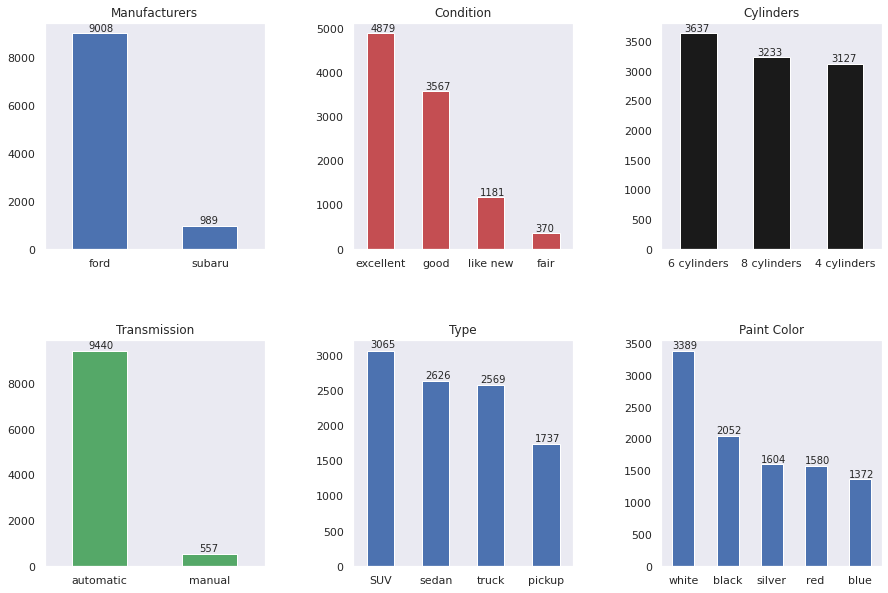

In [191]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sns.set_style("dark")
manufacturers = df["manufacturer"].value_counts().plot(kind='bar', ax=axes[0,0], title="Manufacturers")
plot_detailing(-0.1, 100, manufacturers)

condition = df["condition"].value_counts().plot(kind="bar", color='r', ax=axes[0,1], title="Condition")
plot_detailing(-0.19, 40, condition)

cylinders = df["cylinders"].value_counts().plot(kind="bar", color='k', ax=axes[0,2], title="Cylinders")
plot_detailing(-0.19, 40, cylinders)

transmission = df["transmission"].value_counts().plot(kind="bar", color='g', ax=axes[1,0], title="Transmission")
plot_detailing(-0.1, 100, transmission)

vehicle_type = df["type"].value_counts().plot(kind="bar", color='b', ax=axes[1,1], title="Type")
plot_detailing(-0.19, 40, vehicle_type)

paint_color = df["paint_color"].value_counts().plot(kind="bar", ax=axes[1,2], title="Paint Color")
plot_detailing(-0.25, 30, paint_color)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9de06fe9d0>]],
      dtype=object)

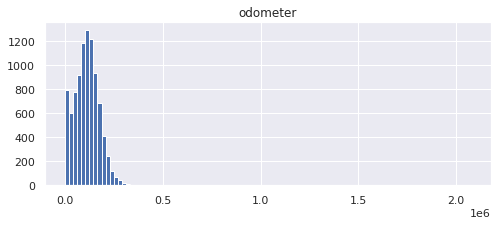

In [192]:
#plotting a histogram for 'odometer'

df.hist(column='odometer', bins=100, figsize=(8,3))



---
As we can infer from the histogram above, besides null values, 'odometer' also has quite a few 0's as values.

Handling the null and 0 values below

---



In [193]:
# Filling values with the median of the 'odometer' column

odo_median = df['odometer'].median()

#filling null values of the 'odometer' feature with median

df['odometer'].fillna(odo_median, inplace=True)

Since cars have odometer values as 0, we further inspect these cases

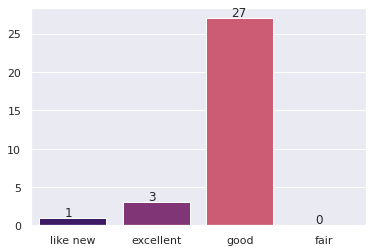

In [194]:
x = ['like new', 'excellent', 'good', 'fair']
y = []
filtered_df = df[df['odometer']==0]

for category in x:
  y.append(filtered_df[filtered_df['condition'] == category].shape[0])

sns.set_theme()
ax = sns.barplot(x, y, palette='magma')
for p in ax.patches:
  _x = p.get_x() + p.get_width() - 0.5
  _y = p.get_height() + 0.25
  value = int(p.get_height())
  ax.text(_x, _y, value, ha="left")

Cars can be in new or excellent condition given they have odometer value as 0. We further need to invesigate cars in good condition but 0 odometer value.

In [195]:
df.loc[(df['odometer']==0) & (df['condition']=='good')]

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
377,500.0,2014.0,ford,good,8 cylinders,gas,0.0,automatic,truck,white,3457,2.344773,0.080253,a
932,0.0,2018.0,ford,good,8 cylinders,gas,0.0,automatic,truck,black,3532,2.216478,0.129909,c
1462,800.0,2011.0,ford,good,8 cylinders,gas,0.0,automatic,truck,white,1634,2.131409,0.181210,b
1536,800.0,2014.0,ford,good,8 cylinders,gas,0.0,automatic,truck,white,1629,2.330552,0.220528,b
1894,800.0,2018.0,ford,good,8 cylinders,gas,0.0,automatic,truck,black,3532,2.314243,0.153440,b
2619,0.0,2018.0,ford,good,8 cylinders,gas,0.0,automatic,truck,black,3532,2.509171,0.184244,c
3280,500.0,2014.0,ford,good,8 cylinders,gas,0.0,automatic,truck,white,3457,2.421378,0.209385,a
3811,800.0,2011.0,ford,good,8 cylinders,gas,0.0,automatic,truck,white,3455,2.360070,-0.075591,b
5014,0.0,2018.0,ford,good,8 cylinders,gas,0.0,automatic,truck,black,3532,2.526812,0.061274,c
5155,0.0,2008.0,ford,good,8 cylinders,gas,0.0,automatic,truck,white,1619,2.357825,0.052390,c


In [196]:
#checking if all null values have been taken care of
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   float64
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9997 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9de027a390>]],
      dtype=object)

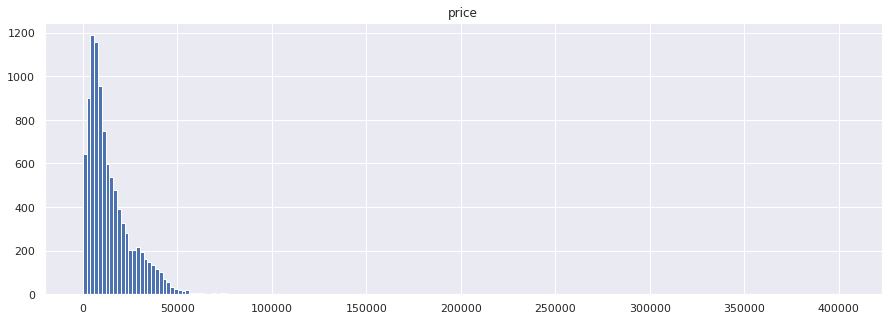

In [197]:
#plotting histogram for price to see the general distribution of values

df.hist(column='price', bins=200, figsize=(15,5))



---
Less number of values that are greater than 100,000.These may be outliers.


---




In [198]:
# Replacing price where price < 10 with median of price within each condition category

like_new_median = df['price'].loc[(df['price']!=0) & (df['condition']=='like new')].median()
df['price'].loc[(df['price']<10) & (df['condition']=='like new')] = like_new_median

excellent_median = df['price'].loc[(df['price']!=0) & (df['condition']=='excellent')].median()
df['price'].loc[(df['price']<10) & (df['condition']=='excellent')] = excellent_median

good_median = df['price'].loc[(df['price']!=0) & (df['condition']=='good')].median()
df['price'].loc[(df['price']<10) & (df['condition']=='good')] = good_median

In [199]:
df.describe()

,price,year,odometer,F1,F2,F3
count,9997.000000,9997.000000,9.997000e+03,9997.000000,9997.000000,9997.000000
mean,14420.150545,2009.814144,1.119075e+05,1523.945584,2.225496,0.099283
std,12418.609701,8.862341,7.783113e+04,2090.438720,0.227250,0.100833
min,215.000000,1922.000000,0.000000e+00,4.000000,0.167352,-0.313948
25%,5867.000000,2007.000000,6.987700e+04,311.000000,2.133806,0.029968
50%,10728.000000,2012.000000,1.100000e+05,717.000000,2.255670,0.099648
75%,19464.000000,2015.000000,1.469280e+05,1966.000000,2.362382,0.167504
max,402498.000000,2021.000000,2.074484e+06,36773.000000,2.742570,0.473412


In [200]:
df['type'].value_counts()

SUV       3065
sedan     2626
truck     2569
pickup    1737
Name: type, dtype: int64

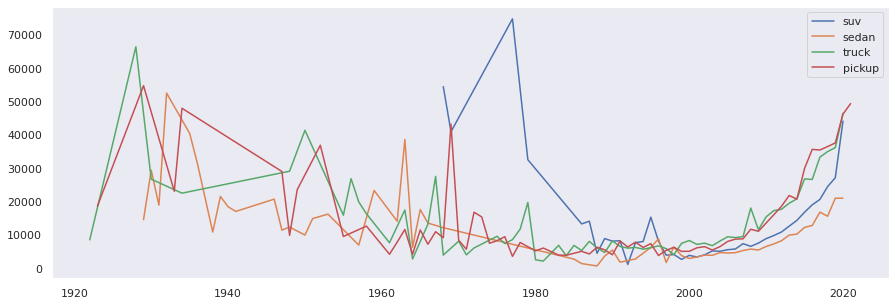

In [201]:
# avg price of a vehicle by year

sns.set_style('dark')
fig = plt.figure(figsize=(15,5))

suv = df[df['type']=='SUV'].groupby('year').mean().reset_index()
sns.lineplot(np.array(suv['year']), np.array(suv['price']), label='suv')

sedan = df[df['type']=='sedan'].groupby('year').mean().reset_index()
sns.lineplot(np.array(sedan['year']), np.array(sedan['price']), label='sedan')

truck = df[df['type']=='truck'].groupby('year').mean().reset_index()
sns.lineplot(np.array(truck['year']), np.array(truck['price']), label='truck')

pickup = df[df['type']=='pickup'].groupby('year').mean().reset_index()
sns.lineplot(np.array(pickup['year']), np.array(pickup['price']), label='pickup')


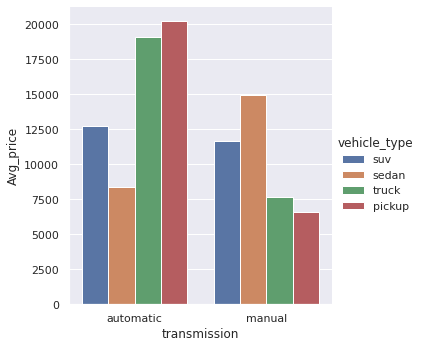

In [202]:
# avg price of vehicles based on transmission type

def transmission_by_vehicle_type():
  vehicle_types = ['SUV','sedan', 'truck', 'pickup']
  auto_mean = []
  manual_mean = []
  for vehicle in vehicle_types:
    automatic = df['price'].loc[(df['type']==vehicle) & (df['transmission']=='automatic')].mean()
    manual = df['price'].loc[(df['type']==vehicle) & (df['transmission']=='manual')].mean()
    auto_mean.append(automatic)
    manual_mean.append(manual)
  
  return auto_mean, manual_mean

vehicle_types = ['transmission','suv', 'sedan', 'truck', 'pickup']
auto_means, manual_means = transmission_by_vehicle_type()

data = {'transmission':['automatic', 'manual'], 
        'suv':[auto_means[0], manual_means[0]],
        'sedan':[auto_means[1], manual_means[1]],
        'truck':[auto_means[2], manual_means[2]],
        'pickup':[auto_means[3], manual_means[3]]}

test_df = pd.DataFrame(data)

test_df = pd.melt(test_df, id_vars="transmission", var_name="vehicle_type", value_name="Avg_price")

sns.set_theme()
sns.factorplot(x='transmission', y='Avg_price', hue='vehicle_type', data=test_df, kind='bar')

since this is not a time series problem, we redifine year as age of car

In [203]:
# getting current year
from datetime import date
current_date = date.today()
current_year = current_date.year

df['age'] = df['year'] - current_year

In [204]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4,age
0,18219.0,2008.0,ford,excellent,8 cylinders,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b,-14.0
1,800.0,2008.0,ford,excellent,6 cylinders,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b,-14.0
2,23660.0,2016.0,ford,good,8 cylinders,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c,-6.0
3,5335.0,2009.0,ford,excellent,4 cylinders,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c,-13.0
4,1597.0,1999.0,ford,good,6 cylinders,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c,-23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,18924.0,2017.0,ford,good,4 cylinders,gas,122612.0,automatic,sedan,silver,3588,2.202934,0.212334,b,-5.0
9993,4248.0,2002.0,ford,like new,6 cylinders,gas,110000.0,automatic,sedan,silver,157,2.147843,0.070923,a,-20.0
9994,26269.0,2017.0,ford,excellent,6 cylinders,gas,52541.0,automatic,SUV,white,1499,2.392569,0.094751,c,-5.0
9995,6149.0,2013.0,ford,good,4 cylinders,gas,197000.0,automatic,SUV,black,180,2.269796,0.129762,a,-9.0


In [205]:
# cylinder count is based on an ordinal scale. We convert these to actual integer values - 4,6,8

df['n_cylinders'] = [0]*df.shape[0]
df['n_cylinders'][df['cylinders']=='8 cylinders'] = 8
df['n_cylinders'][df['cylinders']=='6 cylinders'] = 6
df['n_cylinders'][df['cylinders']=='4 cylinders'] = 4

In [206]:
# Scaling

from sklearn.preprocessing import StandardScaler

cols = ['odometer', 'F1', 'F2', 'F3', 'age', 'n_cylinders']
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

# Finding Correlations between features and target variable(price)

In [207]:
cols = ['price','odometer', 'F1', 'F2', 'F3', 'age', 'n_cylinders']
CM = df[cols].corr()
CM["price"].sort_values(ascending=False)

price          1.000000
age            0.330312
F2             0.299539
F1             0.203710
n_cylinders    0.172505
F3             0.100678
odometer      -0.377200
Name: price, dtype: float64

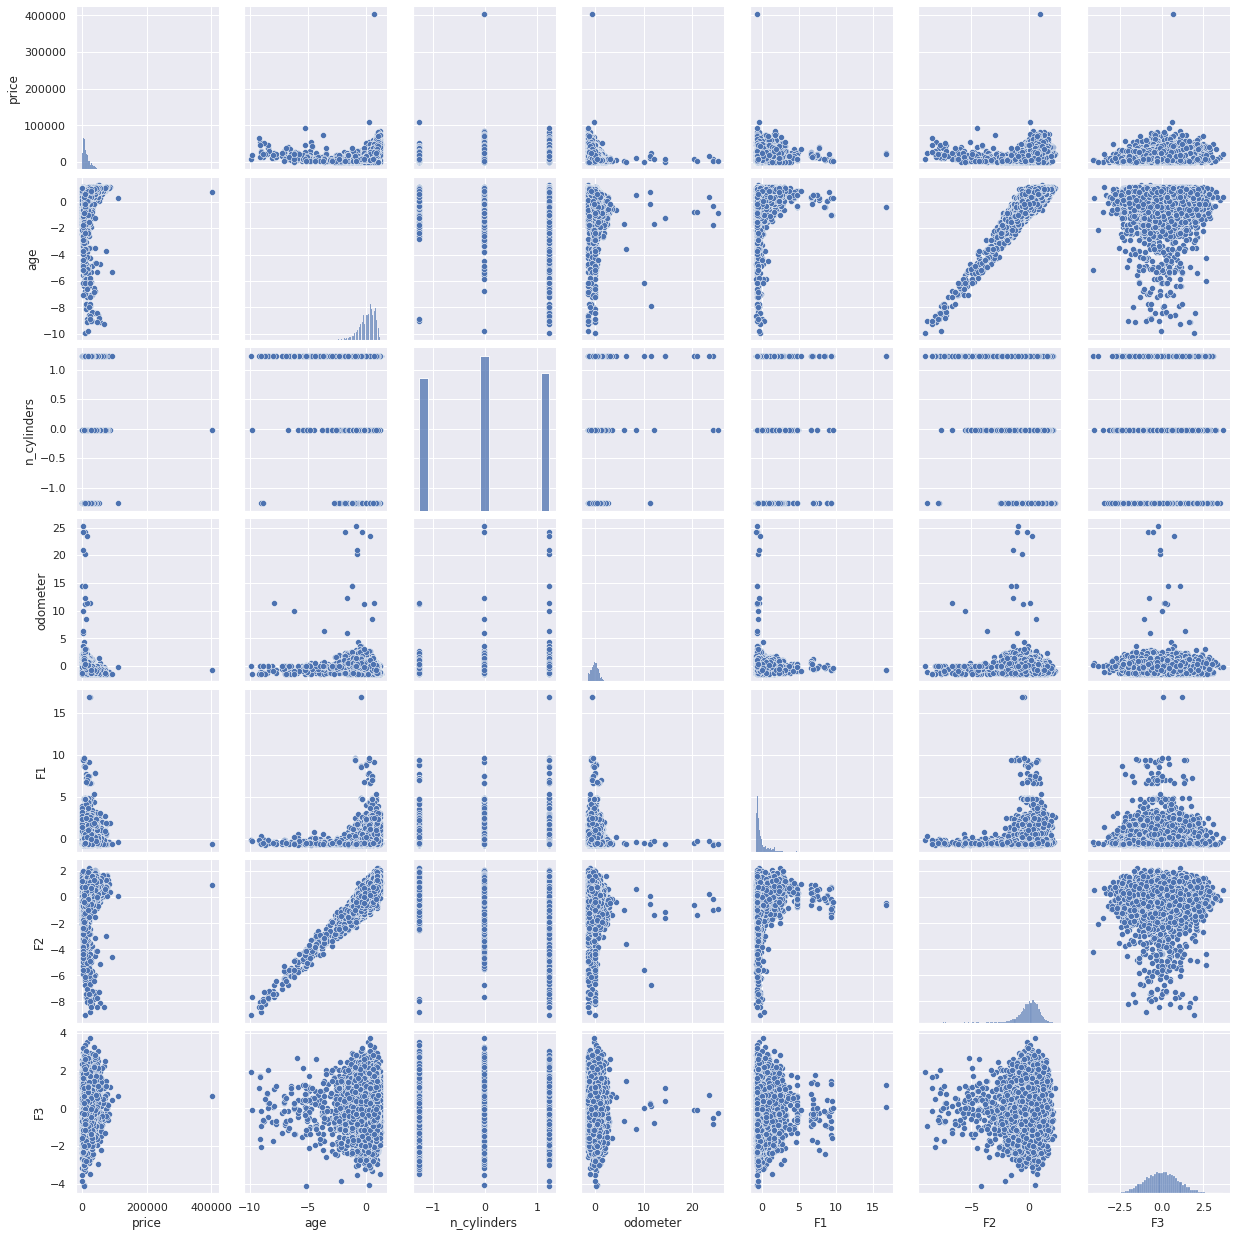

In [208]:
cols = ['price', 'age','n_cylinders', 'odometer', 'F1', 'F2', 'F3']
sns.pairplot(df[cols])

In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# # test_df['age+F2'] = test_df['age'] + test_df['F2'] # 1.28
# # test_df['age*F2'] = test_df['age'] * test_df['F2'] #1.023
# # test_df['age-F2'] = test_df['age'] - test_df['F2'] # 1.01
# df['age/F2'] = df['age'] / df['F2'] # 1

# df.drop(['age','F2'], axis=1, inplace=True)
cols = ['price', 'n_cylinders', 'odometer', 'F1', 'age','F2', 'F3']

X = df[cols].assign(const=1)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

price          1.442694
n_cylinders    1.216759
odometer       1.243726
F1             1.073040
age            5.487459
F2             5.206943
F3             1.014235
const          2.945411
dtype: float64

In [210]:
#fuel feature can be dropped as it has only one value and hence will not affect the final prediction

df.drop('fuel', axis=1, inplace=True)

In [211]:
#creating a new dataframe (copy of df)

df_en = df

In [212]:
df_en['F1F2F3'] = df_en.F1 + df_en.F2 + df_en.F3

In [213]:
df.corr()

,price,year,odometer,F1,F2,F3,age,n_cylinders,F1F2F3
price,1.000000,0.330312,-0.377200,0.203710,0.299539,0.100678,0.330312,0.172505,0.329091
year,0.330312,1.000000,-0.239771,0.192563,0.898803,0.008190,1.000000,-0.264637,0.599168
odometer,-0.377200,-0.239771,1.000000,-0.175696,-0.217477,-0.005170,-0.239771,0.137404,-0.217065
F1,0.203710,0.192563,-0.175696,1.000000,0.173151,-0.005872,0.192563,-0.006067,0.636072
F2,0.299539,0.898803,-0.217477,0.173151,1.000000,0.016584,0.898803,-0.240514,0.648309
F3,0.100678,0.008190,-0.005170,-0.005872,0.016584,1.000000,0.008190,-0.001372,0.550756
age,0.330312,1.000000,-0.239771,0.192563,0.898803,0.008190,1.000000,-0.264637,0.599168
n_cylinders,0.172505,-0.264637,0.137404,-0.006067,-0.240514,-0.001372,-0.264637,1.000000,-0.135114
F1F2F3,0.329091,0.599168,-0.217065,0.636072,0.648309,0.550756,0.599168,-0.135114,1.000000


In [214]:
df_en.drop(['year','cylinders'], axis=1, inplace=True)

In [215]:
# One hot encoding
df_en = pd.get_dummies(df_en)
df_en

,price,odometer,F1,F2,F3,age,n_cylinders,F1F2F3,manufacturer_ford,manufacturer_subaru,...,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_red,paint_color_silver,paint_color_white,F4_a,F4_b,F4_c
0,18219.0,-0.329826,2.056635,-0.139288,-1.301918,-0.204713,1.240553,0.615428,1,0,...,0,0,1,0,0,0,0,0,1,0
1,800.0,0.758674,0.239222,-0.404001,-0.012875,-0.204713,-0.013295,-0.177654,1,0,...,0,0,0,0,1,0,0,0,1,0
2,23660.0,0.091466,-0.588397,-0.284445,-0.518696,0.698028,1.240553,-1.391538,1,0,...,0,1,0,0,0,0,1,0,0,1
3,5335.0,-0.551317,0.966379,-0.486568,-2.076854,-0.091870,-1.267142,-1.597043,1,0,...,1,0,0,1,0,0,0,0,0,1
4,1597.0,-0.678136,-0.093260,-1.742092,-1.585857,-1.220297,-0.013295,-3.421209,1,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,18924.0,0.137542,0.987428,-0.099286,1.121224,0.810871,-1.267142,2.009366,1,0,...,1,0,0,0,0,1,0,0,1,0
9993,4248.0,-0.024509,-0.653936,-0.341725,-0.281276,-0.881769,-0.013295,-1.276938,1,0,...,1,0,0,0,0,1,0,1,0,0
9994,26269.0,-0.762798,-0.011934,0.735233,-0.044948,0.810871,-0.013295,0.678351,1,0,...,0,0,0,0,0,0,1,0,0,1
9995,6149.0,1.093352,-0.642933,0.194951,0.302284,0.359500,-1.267142,-0.145698,1,0,...,0,0,1,0,0,0,0,1,0,0


In [216]:
#setting the response variable

y = df_en['price']
x = df_en.drop('price', axis=1)

In [217]:
x.shape, y.shape

((9997, 27), (9997,))

In [218]:
#splitting dataset into training and test data

from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(x, y):
  x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]



In [219]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7998, 27), (7998,), (1999, 27), (1999,))

## Linear Regression

In [220]:
#Performing the linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

regressor = LinearRegression()
regressor.fit(x_train, y_train) #fitting the model

y_pred = regressor.predict(x_test) #predicting response variable

LRrmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Root Mean Squared Error
LRmae = mean_absolute_error(y_test, y_pred) #Mean Absolute Error

print(f'RMSE = {LRrmse}\nMAE = {LRmae}')

RMSE = 8553.05530879406
MAE = 5789.009627892361


## Ridge Regression

In [221]:
#Performing the Ridge regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, max_error, mean_absolute_error

params = {'alpha':[1, 10, 50, 100, 150, 200, 500]}
regressor = Ridge()

rd_reg = GridSearchCV(regressor, params, scoring='neg_mean_squared_error', cv=5)
rd_reg.fit(x_train, y_train) #fitting the model

rd_reg.best_estimator_

Ridge(alpha=10)

In [222]:
best_model = rd_reg.best_estimator_
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test) #predicting response variable

Rrmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Root Mean Squared Error
Rmae = mean_absolute_error(y_test, y_pred) #Mean Absolute Error

print(f'RMSE = {Rrmse}\nMAE = {Rmae}')

RMSE = 8551.415314984279
MAE = 5785.458588625142


## LASSO

In [223]:
#Performing the LASSO regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, max_error, mean_absolute_error

ls_regressor = Lasso(max_iter=5000)
ls_params = {'alpha':[1, 10, 50, 100, 150, 200, 500]}

ls_reg = GridSearchCV(ls_regressor, ls_params, scoring='neg_mean_squared_error', cv=5)
ls_reg.fit(x_train, y_train)
ls_reg.best_estimator_


Lasso(alpha=1, max_iter=5000)

In [224]:
ls_best_model = ls_reg.best_estimator_
ls_best_model.fit(x_train, y_train) #fitting the model

y_pred = ls_best_model.predict(x_test) #predicting response variable

Lrmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Root Mean Squared Error
Lmae = mean_absolute_error(y_test, y_pred) #Mean Absolute Error

print(f'RMSE = {Lrmse}\nMAE = {Lmae}')

RMSE = 8552.693565261601
MAE = 5787.730222826806
